In [59]:
#Libraries needed
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
og=pd.read_csv('train.csv', sep=',')
df = og.copy()

og_slo=pd.read_csv('RealEstate.csv', sep =',')
df_slo = og_slo.copy()

og_nc=pd.read_excel('woodard.xls')
df_nc = og_nc.copy()

In [77]:
# df_slo.head() #overlap - price, bedrooms, bathrooms, house size, status
df_nc.head() #overlap - price, bathrooms, fireplaces(?), house size, plot size, year built

,ID #,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip
0,1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603
1,2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604
2,3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610
3,4,1983,1152,1.0,0.68,2.0,0,131103,50000,81103,27616
4,5,2003,1404,1.0,39.38,2.0,0,4904102,4797750,106352,27519


(array([ 1.,  2.,  0.,  0.,  2.,  2.,  0.,  9.,  3., 15.,  8.,  9., 11.,
         8.,  5.,  2., 10.,  4.,  4.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([10.37922471, 10.52098546, 10.6627462 , 10.80450694, 10.94626768,
        11.08802842, 11.22978916, 11.37154991, 11.51331065, 11.65507139,
        11.79683213, 11.93859287, 12.08035361, 12.22211436, 12.3638751 ,
        12.50563584, 12.64739658, 12.78915732, 12.93091807, 13.07267881,
        13.21443955, 13.35620029, 13.49796103, 13.63972177, 13.78148252,
        13.92324326]),
 <a list of 25 Patch objects>)

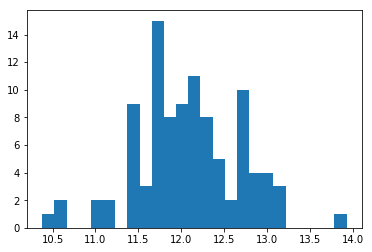

In [97]:
# df_nc[df_nc['Total $'] > 4000000]
too_big = np.std(df_nc['Total $'])*2 + np.mean(df_nc['Total $']) # remove above this
fixed_nc = df_nc[df_nc['Total $'] < too_big ]
plt.hist(np.log(fixed_nc['Total $']),bins = 25)

Text(0.5,1,'Log Sales Price vs Square Footage')

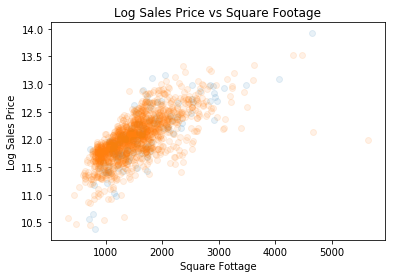

In [93]:
plt.scatter(fixed_nc['Sq. Ft.'], np.log(fixed_nc['Total $']), alpha = 0.1)
plt.scatter(df['GrLivArea'], np.log(df['SalePrice']), alpha = 0.1 )
plt.ylabel('Log Sales Price')
plt.xlabel('Square Fottage')
plt.title('Log Sales Price vs Square Footage')

In [63]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

755000

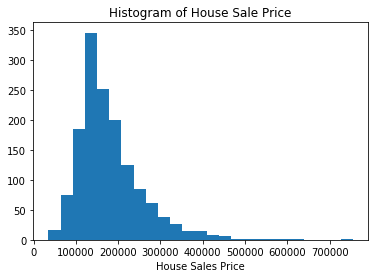

In [60]:
plt.hist(df['SalePrice'], bins = 25)
plt.xlabel('House Sales Price')
plt.title('Histogram of House Sale Price')
max(df['SalePrice'])

Text(0.5,1,'Histogram of Log of House Sale Price')

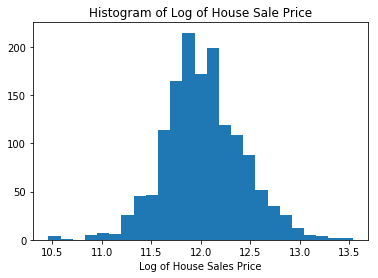

In [5]:
df['log_SalePrice'] = np.log(df['SalePrice'])
plt.hist(df['log_SalePrice'], bins = 25)
plt.xlabel('Log of House Sales Price')
plt.title('Histogram of Log of House Sale Price')

In [43]:
# custom_bucket_array = np.linspace(1870, 2020, 16)
# custom_bucket_array
print(df['SalePrice'].groupby(df['Neighborhood']).mean())

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64


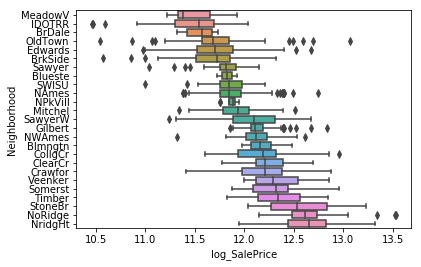

In [49]:
sns.boxplot(x = df['log_SalePrice'], y = df['Neighborhood'], 
            order =df['log_SalePrice'].groupby(df['Neighborhood']).median().sort_values().index.values )

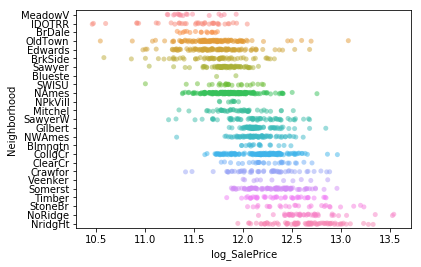

In [58]:
sns.stripplot(x = df['log_SalePrice'], y = df['Neighborhood'], 
            order =df['log_SalePrice'].groupby(df['Neighborhood']).median().sort_values().index.values,
              jitter=0.1, alpha = 0.50 )

In [ ]:
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha = 0.25)

Text(0.5,1,'Log Sales Price vs Square Footage')

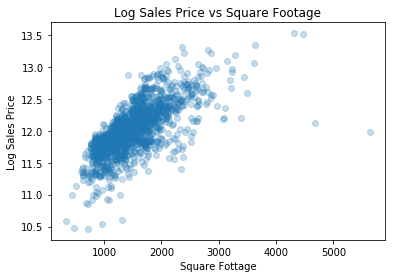

In [6]:
plt.scatter(df['GrLivArea'], df['log_SalePrice'], alpha = 0.25)
plt.ylabel('Log Sales Price')
plt.xlabel('Square Fottage')
plt.title('Log Sales Price vs Square Footage')

In [13]:
def find_null_count(df):
    col = df.columns[df.isnull().any()]
    count_nulls = df[col].isnull().sum()
    return count_nulls.sort_values(ascending = False)

# df['PoolQC'].isnull().sum()
find_null_count(df)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [14]:
df.dtypes.value_counts()

object     43
int64      35
float64     4
dtype: int64

In [69]:
df['SaleCondition'][df['GrLivArea'] > 4000]
df[df['GrLivArea'] > 4000]
df['GrLivArea'][df['GrLivArea'] > 4000]


523     4676
691     4316
1182    4476
1298    5642
Name: GrLivArea, dtype: int64